**Proyecto de Random Forest**

Utiliza los datos que has analizado en el proyecto anterior.
Continúa con el desarrollo para buscar un modelo que se adapte mejor.

**🌱 Cómo iniciar este proyecto**

Sigue las siguientes instrucciones:

- Crea un nuevo repositorio basado en el proyecto de Machine Learing haciendo clic aquí.
- Abre el repositorio creado recientemente en Codespace usando la extensión del botón de Codespace.
- Una vez que el VSCode del Codespace haya terminado de abrirse, comienza tu proyecto siguiendo las instrucciones a continuación.

**🚛 Cómo entregar este proyecto**

Una vez que hayas terminado de resolver el caso práctico, asegúrate de confirmar tus cambios, haz push a tu repositorio y ve a 4Geeks.com para subir el enlace del repositorio.

**📝 Instrucciones**

**Prediciendo la diabetes**

En el proyecto anterior vimos cómo podíamos utilizar un árbol de decisión para predecir conjuntos de datos relacionados con la clasificación y la regresión. Sin embargo, ¿sabías que podemos mejorar la predicción de un árbol utilizando un random forest?

Como hemos estudiado, un random forest es una agrupación de árboles generados con porciones aleatorias de los datos y con criterios también aleatorios. Esta visión nos permitiría mejorar la efectividad del modelo cuando un árbol individual no es suficiente.

En este proyecto te centrarás en esta idea entrenando el conjunto de datos para mejorar el accuracy.

Recuerda que el proyecto anterior puedes encontrarlo aquí.

**Paso 1: Carga del conjunto de datos**
Carga el conjunto de datos procesado del proyecto anterior (dividido en muestras de entrenamiento y pruebas y analizado con el EDA).

**Paso 2: Construye un random forest**
Una forma de optimizar y mejorar los resultados cuando usamos árboles de decisión es generar un random forest con árboles suficientes de tal forma que haya una variedad necesaria que enriquezca la predicción. Entrénalo y analiza sus resultados. Prueba a modificar los dos hiperparámetros que definen al árbol con distintos valores y analiza su impacto con la precisión final y grafica las conclusiones.

**Paso 3: Guarda el modelo**
Almacena el modelo en la carpeta correspondiente.

### Imports

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from pickle import dump
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import os
from sklearn.ensemble import RandomForestClassifier
from utils import get_classifier_metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint


### Cargamos los datos anteriores

In [12]:
ruta = "models/train_test_split.pkl"

with open(ruta, "rb") as f:
    df = pickle.load(f)
df


(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 60             2       84              0              0        0   0.0   
 618            9      112             82             24        0  28.2   
 346            1      139             46             19       83  28.7   
 294            0      161             50              0        0  21.9   
 231            6      134             80             37      370  46.2   
 ..           ...      ...            ...            ...      ...   ...   
 71             5      139             64             35      140  28.6   
 106            1       96            122              0        0  22.4   
 270           10      101             86             37        0  45.6   
 435            0      141              0              0        0  42.4   
 102            0      125             96              0        0  22.5   
 
      DiabetesPedigreeFunction  Age  
 60                      0.304   21  
 618                  

In [13]:
X_train, X_test, y_train, y_test = df[0], df[1], df[2], df[3]



In [14]:
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)



,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


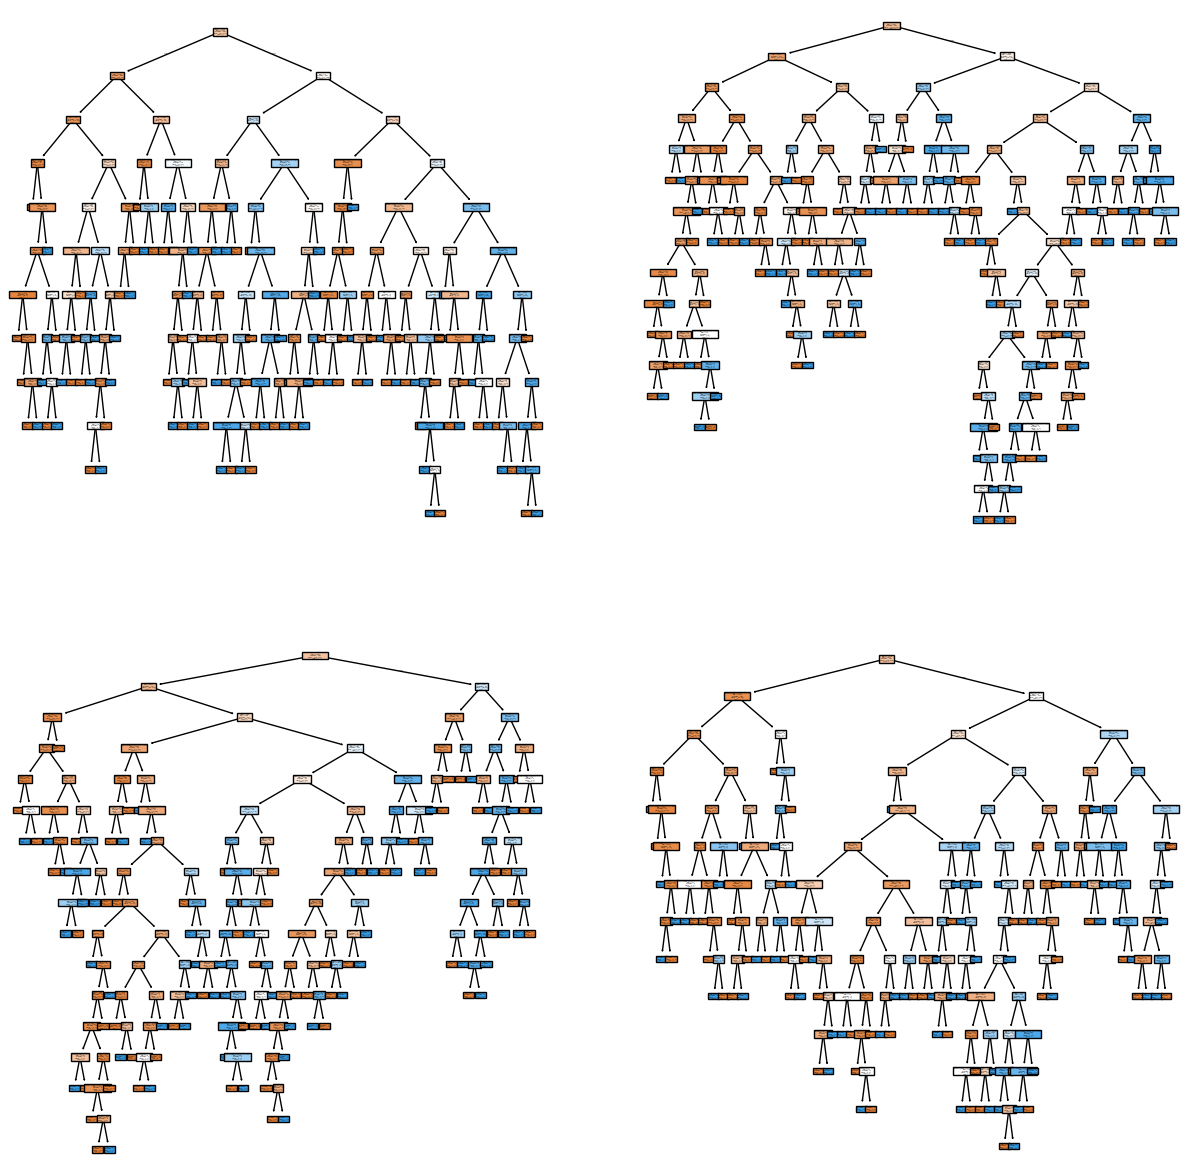

In [15]:

fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# We show the first 4 trees out of the 100 generated (default)
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

### Paso 3: Prediccion

In [16]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [17]:
accuracy_score(y_test, y_pred)

0.7207792207792207

### Buscamos los mejores hiperparametros con GridSearchCV

In [18]:
model = RandomForestClassifier(random_state=42)

param_grid = {
    "n_estimators": [10, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}


grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_search

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [19]:
grid_search.fit(X_train, y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [20]:
resultados_Grid = {'Best Parametres':grid_search.best_params_ , 
                   'Best Score':float(grid_search.best_score_)}
resultados_Grid

{'Best Parametres': {'max_depth': None,
  'max_features': 'log2',
  'min_samples_leaf': 2,
  'min_samples_split': 10,
  'n_estimators': 200},
 'Best Score': 0.7883113421298147}

In [21]:
best_model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=None, min_samples_leaf=2, min_samples_split=10, max_features='log2')


In [22]:
best_model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,10
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [23]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [24]:
accuracy_score(y_test, y_pred)

0.7532467532467533

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



### Utilizamos nuestros mejores parametros encontrados en GridSearchCV

In [26]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]}


In [ ]:
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,             
    scoring="accuracy",
    n_jobs=-1)

grid_search.fit(X_train, y_train)


In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_


In [ ]:
best_result_grid = {'Best Parametres':grid_search.best_params_ , 
                    'Best Score':float(grid_search.best_score_)}
best_result_grid

{'Best Parametres': {'max_depth': None,
  'max_features': 'log2',
  'min_samples_leaf': 2,
  'min_samples_split': 10,
  'n_estimators': 300},
 'Best Score': 0.79156337465014}

In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


In [ ]:
accuracy_score(y_test, y_pred)

0.7532467532467533

### Buscamos los mejores hiperparametros con RandomizedSearchCV

In [ ]:
rf_model = RandomForestClassifier(random_state=42)

param_dist = {
    "n_estimators": randint(50, 500),
    "max_depth": randint(5, 50),
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 10),
    "max_features": ["sqrt", "log2", None]}

random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1)

random_search.fit(X_train, y_train)



,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'max_depth': <scipy.stats....x709ce1d4ab90>, 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': <scipy.stats....x709ce1d4be50>, 'min_samples_split': <scipy.stats....x709ce1d4a390>, ...}"
,n_iter,30
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [ ]:
best_params = random_search.best_params_
best_score = random_search.best_score_


In [ ]:
resultados_random = {'Best Parametres':random_search.best_params_ , 
                    'Best Score':float(random_search.best_score_)}
resultados_random

{'Best Parametres': {'max_depth': 9,
  'max_features': 'log2',
  'min_samples_leaf': 7,
  'min_samples_split': 10,
  'n_estimators': 77},
 'Best Score': 0.783433293349327}

In [ ]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)


In [ ]:
resultados_Grid = {'Best Parametres': random_search.best_estimator_ , 
                   'Best Score': float(grid_search.best_score_)}
resultados_Grid

{'Best Parametres': RandomForestClassifier(max_depth=9, max_features='log2', min_samples_leaf=7,
                        min_samples_split=10, n_estimators=77, random_state=42),
 'Best Score': 0.79156337465014}

In [ ]:
accuracy_score(y_test, y_pred)

0.7727272727272727

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82        99
           1       0.69      0.67      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [ ]:
class_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
class_report

,0,1,accuracy,macro avg,weighted avg
precision,0.820000,0.685185,0.772727,0.752593,0.771852
recall,0.828283,0.672727,0.772727,0.750505,0.772727
f1-score,0.824121,0.678899,0.772727,0.751510,0.772256
support,99.000000,55.000000,0.772727,154.000000,154.000000


### Guardamos nuestro mejor modelo


In [ ]:
# Guardar modelo + datos de split en un diccionario
bundle = {
    "model": best_model,
    "X_train": X_train,
    "X_test": X_test,
    "y_train": y_train,
    "y_test": y_test
}

with open("best_model_bundle.pkl", "wb") as f:
    pickle.dump(bundle, f)

